<a href="https://colab.research.google.com/github/julichitai/learning_NN/blob/MIPT/mipt_%5Bseminar%5Dpytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h2 style="text-align: center;"><b>Семинар 6. Основы библиотеки PyTorch </b></h2>


# PyTorch basics: syntax, torch.cuda and torch.autograd</b></h2>

<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

Hi! In this notebook we will cover the basics of the **PyTorch deep learning framework**. 

https://youtu.be/aW9BgoKalY0

<h3 style="text-align: center;"><b>Intro</b></h3>

**Frameworks** are the specific code libraries with their own internal structure and pipelines.

There are many deep learning frameworks nowadays (02/2019). The difference between them is in the internal computation principles. For example, in **[Caffe](http://caffe.berkeleyvision.org/)** and **[Caffe2](https://caffe2.ai/)** you write the code using some "ready blocks" (just like the $LEGO^{TM}$ :). In **[TensorFlow](https://www.tensorflow.org/)** and **[Theano](http://deeplearning.net/software/theano/)** you declare the computation graph at first, then compile it and use it for inference/training (`tf.session()`). By the way, now TensorFlow (since v1.10) has the [Eager Execution](https://www.tensorflow.org/guide/eager), which can be handy for fast prototyping and debugging. **[Keras](https://keras.io/)** is a very popular and useful DL framework that allows to create networks fast and has many demanding features. 

<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png" width=500 height=500></p>  
<p style="text-align: center;"><i>Image credit: https://habr.com/post/334380/</i><p>

We will use PyTorch bacause it's been actively developed and supported by the community and [Facebook AI Research](https://research.fb.com/category/facebook-ai-research/).

<h3 style="text-align: center;"><b>Installation</b></h3>

The detailed instruction on how to install PyTorch you can find on the [official PyTorch website](https://pytorch.org/).

## Syntax

In [ ]:
import torch

Some facts about PyTorch:  
- dynamic computation graph
- handy `torch.nn` and `torchvision` modules for fast neural network prototyping
- even faster than TensorFlow on some tasks
- allows to use GPU easily

At its core, PyTorch provides two main features:

- An n-dimensional Tensor, similar to numpy but can run on GPUs
- Automatic differentiation for building and training neural networks

If PyTorch was a formula, it would be:  

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

Let's see how we can use PyTorch to operate with vectors and tensors.  

Recall that **a tensor** is a multidimensional vector, e.g. :  

`x = np.array([1,2,3])` -- a vector = a tensor with 1 dimension (to be more precise: `(3,)`)  
`y = np.array([[1, 2, 3], [4, 5, 6]])` -- a matrix = a tensor with 2 dimensions (`(2, 3)` in this case)  
`z = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])` -- "a cube" (3, 3, 3) = a tensor with 3 dimensions (`(3, 3, 3)` in this case)

One real example of 3-dimensional tensor is **an image**, it has 3 dimensions: `height`, `width` and the `channel depth` (= 3 for color images, 1 for a greyscale). You can think of it as of parallelepiped consisting of the real numbers.

In PyTorch we will use `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) for all the computations.

All tensor types:

In [ ]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

We will use only `torch.FloatTensor()` and `torch.IntTensor()`. 

Let's begin to do something!

* Creating the tensor:

In [ ]:
a = torch.FloatTensor([1, 2])
a


tensor([1., 2.])

In [ ]:
a.shape

torch.Size([2])

In [ ]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b.shape

torch.Size([2, 3])

In [ ]:
x = torch.FloatTensor(2,3,4)

In [ ]:
x

tensor([[[8.3752e-36, 0.0000e+00, 7.0065e-44, 6.8664e-44],
         [6.3058e-44, 6.7262e-44, 6.8664e-44, 6.3058e-44],
         [7.0065e-44, 7.2868e-44, 1.1771e-43, 6.7262e-44]],

        [[7.7071e-44, 8.1275e-44, 7.2868e-44, 7.5670e-44],
         [8.1275e-44, 7.1466e-44, 7.7071e-44, 6.4460e-44],
         [7.4269e-44, 7.2868e-44, 7.7071e-44, 7.7071e-44]]])

In [ ]:
x = torch.FloatTensor(100)
x

tensor([ 3.2609e-36,  0.0000e+00,  1.4396e-38,  0.0000e+00,  5.8154e-43,
         0.0000e+00,         nan,         nan,  4.4721e+21,  2.3079e+20,
         6.2689e+22,  4.7428e+30,  1.3563e-19,  1.3817e-19, -1.0752e+10,
        -9.9222e+10,  1.8910e+23,  7.1443e+31,  1.9603e-19,  1.8061e+28,
         7.5527e+28,  5.2839e-11,  2.7604e+20,  1.7744e+28,  2.0535e-19,
         1.3563e-19,  1.0426e-08, -2.3866e+10, -1.7558e+10,  1.8910e+23,
         7.1443e+31,  1.9603e-19,  1.8061e+28,  7.5527e+28,  5.2839e-11,
         1.1319e+21,  6.2688e+22,  4.7428e+30,  1.3563e-19,  1.6962e-07,
        -2.3866e+10, -1.7558e+10,  1.8910e+23,  7.1443e+31,  1.9603e-19,
         1.8061e+28,  4.3747e+31,  4.2964e+24,  7.1901e+28,  6.2706e+22,
         4.7428e+30,  1.3563e-19,  2.3303e-09, -6.0573e-09, -3.0816e-37,
         1.8037e+28,  6.8296e+22,  1.2690e+31,  7.0364e+22,  7.5527e+28,
         5.2839e-11,  4.1993e+12,  7.5338e+28,  1.3563e-19,  1.3563e-19,
         1.0426e-08, -2.3866e+10, -1.7558e+10,  1.2

In [ ]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

**Note:** if you create `torch.Tensor` with the following constructor it will be filled with the "random trash numbers":

In [ ]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[87170816,        0,       50,       49],
         [      45,       48,       49,       45]],

        [[      50,       52,       84,       48],
         [      55,       58,       52,       54]],

        [[      58,       51,       55,       46],
         [      53,       57,       55,       48]]], dtype=torch.int32)

Here is a way to fill a new tensor with zeroes:

In [ ]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_()
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)
x1

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Random distribution initialization

In [ ]:
x = torch.randn((2,3))                # Normal(0, 1) with shape
x

tensor([[-1.4431,  1.0656,  0.5158],
        [-0.4010,  0.4336, -0.6314]])

In [ ]:
x.random_(0, 10)                      # discrete U[0, 10]
x.uniform_(0, 1)                      # U[0, 1]
x.normal_(mean=0, std=1)              # Normal with mean and std
x.bernoulli_(p=0.5)                   # bernoulli with parameter p

tensor([[0., 0., 1.],
        [1., 1., 0.]])

## Numpy -> Torch

All numpy function have its pair in torch.

https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

`np.reshape()` == `torch.view()`:

In [ ]:
b, b.stride()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]), (3, 1))

In [ ]:
b.view(3, 2), b.view(3, 2).stride()  

(tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]), (2, 1))

**Note:** `torch.view()` creates a new tensor, one the old one remains unchanged

In [ ]:
b.view(-1)

tensor([1., 2., 3., 4., 5., 6.])

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b.T.stride(), b.is_contiguous(), b.T.is_contiguous()

((1, 3), True, False)

In [ ]:
b.reshape(-1) # returns view or contigues tensor

tensor([1., 2., 3., 4., 5., 6.])

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

* Change a tensor type:

In [ ]:
a = torch.FloatTensor([1.5, 3.2, -7])

In [ ]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [ ]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

In [ ]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

In [ ]:
a.to(torch.uint8)

tensor([  1,   3, 249], dtype=torch.uint8)

**Note:** `.type_as()` creates a new tensor, the old one remains unchanged

In [ ]:
a

tensor([ 1.5000,  3.2000, -7.0000])

* Indexing is just like in `NumPy`:

In [ ]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [ ]:
a[0, 0]

tensor(100.)

In [ ]:
a[0:2, 1]

tensor([ 20., 163.])

**Ariphmetics and boolean operations** and their analogues:  

| Operator | Analogue |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

* Addition:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [ ]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [ ]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [ ]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

* Subtraction:

In [ ]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [ ]:
a.sub(b) # copy

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [ ]:
a.sub_(b) # inplace

tensor([[  3.,   6.,   9.],
        [ 30.,  60.,  90.],
        [300., 600., 900.]])

* Multiplication (elementwise):

In [ ]:
a * b

tensor([[-3.0000e+00, -1.2000e+01, -2.7000e+01],
        [-3.0000e+02, -1.2000e+03, -2.7000e+03],
        [-3.0000e+04, -1.2000e+05, -2.7000e+05]])

In [ ]:
a.mul(b)

tensor([[-3.0000e+00, -1.2000e+01, -2.7000e+01],
        [-3.0000e+02, -1.2000e+03, -2.7000e+03],
        [-3.0000e+04, -1.2000e+05, -2.7000e+05]])

* Division (elementwise):

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

In [ ]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

**Note:** all this operations create new tensors, the old tensors remain unchanged

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

* Comparison operators:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [ ]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [ ]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [ ]:
a > b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

* Using boolean mask indexing:

In [ ]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [ ]:
b[a == b]

tensor([100., 200., 300.])

Elementwise application of the **universal functions**:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [ ]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [ ]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [ ]:
a.tan()

tensor([[ 1.5574, -2.1850, -0.1425],
        [ 0.6484,  2.2372, -6.4053],
        [-0.5872, -1.7925, 45.2447]])

In [ ]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [ ]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [ ]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [ ]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

* The sum, mean, max, min:

In [ ]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [ ]:
a.mean()

tensor(74.)

Along axis:

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
a.sum(dim=0)

tensor([111., 222., 333.])

In [ ]:
a.sum(1)

tensor([  6.,  60., 600.])

In [ ]:
a.max()

tensor(300.)

In [ ]:
a.max(0)

torch.return_types.max(values=tensor([100., 200., 300.]), indices=tensor([2, 2, 2]))

In [ ]:
a.min()

tensor(1.)

In [ ]:
a.min(0)

torch.return_types.min(values=tensor([1., 2., 3.]), indices=tensor([0, 0, 0]))

**Note:** the second tensor returned by `.max()` and `.min()` contains the indices of max/min elements along this axis. E.g. in that case `a.min()` returned `(1, 2, 3)` which are the minimum elements along 0 axis (along columns) and their indices along 0 axis are `(0, 0, 0)`.

**Matrix operations**:

* Transpose a tensor:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

It is not not the inplace operation too:

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

* Dot product of vectors:

In [ ]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [ ]:
a.dot(b)

tensor(-141.)

In [ ]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [ ]:
a @ b

tensor(-141.)

In [ ]:
type(a)

torch.Tensor

In [ ]:
type(b)

torch.Tensor

In [ ]:
type(a @ b)

torch.Tensor

* Matrix product:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [ ]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

Remain unchanged:

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [ ]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 1])


In [ ]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

If we unroll the tensor `b` in an array (`torch.view(-1)`) the multiplication would be like with the column:

In [ ]:
b

tensor([[ -1.],
        [-10.],
        [100.]])

In [ ]:
b.view(-1)

tensor([ -1., -10., 100.])

In [ ]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [ ]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

In [ ]:
y = torch.Tensor(2, 3, 4, 5)
z = torch.Tensor(2, 3, 5, 6)
(y @ z).shape

torch.Size([2, 3, 4, 6])

**From NumPu to PyTorch conversion**:

In [ ]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.41008103, 0.60539465, 0.4483608 ],
       [0.26015056, 0.27474605, 0.3096673 ],
       [0.05233577, 0.09387276, 0.20398469]])

In [ ]:
b = torch.from_numpy(a)
b

tensor([[0.4101, 0.6054, 0.4484],
        [0.2602, 0.2747, 0.3097],
        [0.0523, 0.0939, 0.2040]], dtype=torch.float64)

**NOTE!** `a` and `b` have the same data storage, so the changes in one tensor will lead to the changes in another:

In [ ]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [ ]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

**From PyTorch to NumPy conversion:**

In [ ]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[8.3761e-36, 0.0000e+00, 7.0065e-44, 6.8664e-44],
         [6.3058e-44, 6.7262e-44, 6.8664e-44, 6.3058e-44],
         [7.0065e-44, 7.2868e-44, 1.1771e-43, 6.7262e-44]],

        [[7.7071e-44, 8.1275e-44, 7.4269e-44, 7.7071e-44],
         [8.1275e-44, 6.8664e-44, 7.2868e-44, 6.4460e-44],
         [7.2868e-44, 7.1466e-44, 7.7071e-44, 7.1466e-44]]])

In [ ]:
type(a)

torch.Tensor

In [ ]:
x = a.numpy()
x

array([[[8.376132e-36, 0.000000e+00, 7.006492e-44, 6.866362e-44],
        [6.305843e-44, 6.726233e-44, 6.866362e-44, 6.305843e-44],
        [7.006492e-44, 7.286752e-44, 1.177091e-43, 6.726233e-44]],

       [[7.707142e-44, 8.127531e-44, 7.426882e-44, 7.707142e-44],
        [8.127531e-44, 6.866362e-44, 7.286752e-44, 6.445973e-44],
        [7.286752e-44, 7.146622e-44, 7.707142e-44, 7.146622e-44]]],
      dtype=float32)

In [ ]:
x.shape

(2, 3, 4)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x -= x

In [ ]:
a

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Let's write the `forward_pass(X, w)` ($w_0$ is a part of the $w$) for a single neuron (activation = sigmoid) using PyTorch:

In [ ]:
def forward_pass(X, w):
    return torch.sigmoid(X @ w)

In [ ]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
w = torch.FloatTensor([[-0.5], [2.5]])
result = forward_pass(X, w)
print('result: {}'.format(result))

result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

[CUDA documentation](https://docs.nvidia.com/cuda/)

We can use both CPU (Central Processing Unit) and GPU (Graphical Processing Unit) to make the computations with PyTorch. We can switch between them easily, this is one of the most important things in PyTorch framework.

In [ ]:
x = torch.FloatTensor(1024, 10024).uniform_()
x

tensor([[0.1033, 0.8269, 0.6391,  ..., 0.3381, 0.1414, 0.5972],
        [0.0645, 0.5934, 0.3038,  ..., 0.2678, 0.2448, 0.2763],
        [0.8848, 0.1349, 0.7465,  ..., 0.2547, 0.5932, 0.1564],
        ...,
        [0.5915, 0.1461, 0.9786,  ..., 0.4133, 0.9202, 0.2622],
        [0.1910, 0.7695, 0.0840,  ..., 0.9998, 0.5286, 0.7368],
        [0.9377, 0.3473, 0.5821,  ..., 0.0148, 0.8610, 0.9154]])

In [ ]:
x.is_cuda

False

Place a tensor on GPU (GPU memory is used):

In [ ]:
!nvidia-smi

Sun Jan 24 07:59:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
x = x.cuda()

In [ ]:
!nvidia-smi

Sun Jan 24 07:59:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W /  70W |    989MiB / 15079MiB |      4%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
x

tensor([[0.1033, 0.8269, 0.6391,  ..., 0.3381, 0.1414, 0.5972],
        [0.0645, 0.5934, 0.3038,  ..., 0.2678, 0.2448, 0.2763],
        [0.8848, 0.1349, 0.7465,  ..., 0.2547, 0.5932, 0.1564],
        ...,
        [0.5915, 0.1461, 0.9786,  ..., 0.4133, 0.9202, 0.2622],
        [0.1910, 0.7695, 0.0840,  ..., 0.9998, 0.5286, 0.7368],
        [0.9377, 0.3473, 0.5821,  ..., 0.0148, 0.8610, 0.9154]])

In [ ]:
x = x.cpu()
!nvidia-smi

torch.cuda.empty_cache()
!nvidia-smi

Sun Jan 24 08:01:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |    989MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device("cuda:0")
x = x.to(device)
x

tensor([[0.1033, 0.8269, 0.6391,  ..., 0.3381, 0.1414, 0.5972],
        [0.0645, 0.5934, 0.3038,  ..., 0.2678, 0.2448, 0.2763],
        [0.8848, 0.1349, 0.7465,  ..., 0.2547, 0.5932, 0.1564],
        ...,
        [0.5915, 0.1461, 0.9786,  ..., 0.4133, 0.9202, 0.2622],
        [0.1910, 0.7695, 0.0840,  ..., 0.9998, 0.5286, 0.7368],
        [0.9377, 0.3473, 0.5821,  ..., 0.0148, 0.8610, 0.9154]],
       device='cuda:0')

Let's multiply two tensors on GPU and then move the result on the CPU:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [ ]:
c

tensor([[0.4542, 0.6463, 0.0415,  ..., 0.4853, 0.0051, 0.3724],
        [0.3026, 0.7142, 0.5476,  ..., 0.0740, 0.5755, 0.2842],
        [0.0628, 0.1770, 0.1862,  ..., 0.0436, 0.7516, 0.5041],
        ...,
        [0.0864, 0.0458, 0.0766,  ..., 0.4913, 0.3365, 0.0692],
        [0.2517, 0.0643, 0.0907,  ..., 0.0134, 0.2832, 0.0490],
        [0.1022, 0.1439, 0.0085,  ..., 0.2194, 0.0075, 0.1413]])

In [ ]:
a

tensor([[0.9926, 0.7076, 0.1192,  ..., 0.9631, 0.1362, 0.9744],
        [0.4227, 0.8228, 0.5947,  ..., 0.0928, 0.8844, 0.3200],
        [0.0759, 0.2142, 0.4245,  ..., 0.1814, 0.8860, 0.9200],
        ...,
        [0.4195, 0.3688, 0.2032,  ..., 0.7351, 0.3688, 0.3894],
        [0.9606, 0.2562, 0.5966,  ..., 0.3228, 0.5876, 0.1715],
        [0.9411, 0.6005, 0.5624,  ..., 0.5365, 0.0389, 0.8043]])

Tensors placed on CPU and tensors placed on GPU are unavailable for each other:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [ ]:
a + b

RuntimeError: ignored

Example of working with GPU:

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# check for CUDA availability (NVIDIA GPU)
if torch.cuda.is_available():
    # get the CUDA device name
    device = torch.device('cuda')          # CUDA-device object
    y = torch.ones_like(x, device=device)  # create a tensor on GPU
    x = x.to(device)                       # or just `.to("cuda")`
    z = x + y
    print(z)
    # you can set the type while `.to` operation
    print(z.to("cpu", torch.double))

tensor([[[1.7388, 1.9235, 1.6752, 1.3629, 1.1430],
         [1.8727, 1.9386, 1.3222, 1.3722, 1.0790],
         [1.3230, 1.2318, 1.8966, 1.2765, 1.7202],
         [1.9786, 1.5042, 1.6265, 1.3318, 1.1096],
         [1.8180, 1.3490, 1.7771, 1.6606, 1.3454]],

        [[1.9912, 1.1283, 1.4942, 1.1380, 1.3485],
         [1.8592, 1.3432, 1.7691, 1.7480, 1.9695],
         [1.9932, 1.1941, 1.7667, 1.2844, 1.0491],
         [1.6807, 1.1094, 1.0341, 1.8662, 1.3928],
         [1.7581, 1.6453, 1.9734, 1.0510, 1.6270]],

        [[1.9853, 1.3877, 1.5058, 1.2847, 1.0869],
         [1.2688, 1.8484, 1.8130, 1.8318, 1.4942],
         [1.8187, 1.1712, 1.5287, 1.0522, 1.9530],
         [1.6712, 1.8732, 1.0444, 1.6723, 1.8586],
         [1.8956, 1.9980, 1.9736, 1.5638, 1.1081]],

        [[1.6174, 1.3411, 1.8577, 1.7273, 1.5024],
         [1.6497, 1.9756, 1.5201, 1.4441, 1.5990],
         [1.4243, 1.5111, 1.1884, 1.4059, 1.9257],
         [1.4015, 1.2407, 1.1246, 1.7164, 1.2498],
         [1.8451, 1.2823,

## AutoGrad

**Chain rule (a.k.a. backpropagation in NN)** used here

Assume we have $f(w(\theta))$
$${\frac  {\partial{f}}{\partial{\theta}}}
={\frac  {\partial{f}}{\partial{w}}}\cdot {\frac  {\partial{w}}{\partial{\theta}}}$$


*Additional reading: In multidimentional case it is described by composition of partial derivatives:*
$$
D_\theta(f\circ w) = D_{w(\theta)}(f)\circ D_\theta(w)
$$

Simple example of gradient propagation:

$$y = \sin \left(x_2^2(x_1 + x_2)\right)$$

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465515004099-gr1.jpg" width=700></img>


The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

The examples:

In [ ]:
dtype = torch.float
device = torch.device("cuda:0")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 3, 3, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

In [ ]:
y_pred = (x @ w1).clamp(min=0).matmul(w2)
loss = (y_pred - y).pow(2).sum()
# calculate the gradients
loss.backward()

In [ ]:
print((y_pred - y).pow(2).sum())

tensor(5207.9844, device='cuda:0', grad_fn=<SumBackward0>)


In [ ]:
w1.grad, w2.grad

(tensor([[  425.3984,   495.8633,  -152.1935],
         [-1154.4331, -1075.4670,  1804.5427],
         [ -691.9756,  1092.6959,   415.1182]], device='cuda:0'),
 tensor([[-9.3202e+01, -3.1501e+02,  3.3615e+02, -2.0229e+02,  3.9670e+01,
          -3.9732e+02,  6.6360e+02,  2.5809e+02,  4.6462e+02, -2.4068e+02],
         [-4.4576e+02, -3.4906e+02,  3.8439e+02,  5.0529e-01, -1.6969e+02,
          -1.1056e+02,  2.4516e+02, -2.5365e+01,  1.7321e+02, -2.2201e+02],
         [-1.5747e+02, -2.7146e+02, -1.0332e+02,  5.4361e+02, -4.9663e+02,
           1.9261e+02,  7.8247e+01, -2.6349e+01, -2.4691e+01, -3.0192e+02]],
        device='cuda:0'))

In [ ]:
loss.grad # can't access to non-leaf grad in AD tree

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  """Entry point for launching an IPython kernel.


In [ ]:
# make the variable remember grad of loss
y_pred = (x @ w1).clamp(min=0).matmul(w2)
y_pred.retain_grad()

loss = (y_pred - y).pow(2).sum()
loss.retain_grad()

loss.backward()

In [ ]:
loss.grad

tensor(1., device='cuda:0')

In [ ]:
x.grad # doesn't require grad

In [ ]:
y.grad # doesn't require grad

**NOTE:** the gradients are placed into the `.grad` field of tensors (variables) on which gradients were calculated. Gradients *are not placed* in the variable `loss` here!

In [ ]:
w1

tensor([[ 0.8771,  0.5582,  0.0916],
        [-1.5943, -0.8411,  1.7612],
        [-1.4689,  1.1759,  0.6685]], device='cuda:0', requires_grad=True)

In [ ]:
with torch.no_grad():
    pass

<h3 style="text-align: center;">Further reading:<b></b></h3>

*1). Official PyTorch tutorials: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*2). arXiv article about the deep learning frameworks comparison: https://arxiv.org/pdf/1511.06435.pdf*

*3). Useful repo with different tutorials: https://github.com/yunjey/pytorch-tutorial*

*4). Facebook AI Research (main contributor of PyTorch) website: https://facebook.ai/developers/tools*

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py

In [1]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from torchsummary import summary
import matplotlib.pyplot as plt

In [2]:
# ================================================================== #
#                    1. Basic autograd example                       #
# ================================================================== #

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.3216, -0.5001, -0.3034],
        [ 0.2169,  0.3689,  0.1979]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.0447, -0.3747], requires_grad=True)
loss:  1.7041374444961548
dL/dw:  tensor([[ 0.0542, -1.2189, -0.2693],
        [-0.0012, -0.3798, -0.3549]])
dL/db:  tensor([-0.0655, -1.2422])
loss after 1 step optimization:  1.6705681085586548


Extracting ../../data/cifar-10-python.tar.gz to ../../data/
torch.Size([3, 32, 32])
6


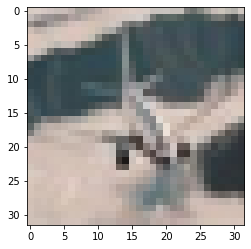

In [3]:
# ================================================================== #
#                         2. Input pipeline                          #
# ================================================================== #

# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print(image.size())
print(label)


# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()
plt.imshow(np.rollaxis(images.data[5].numpy(), 0, 3))
plt.show()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass


In [4]:
# ================================================================== #
#                3. Input pipeline for custom dataset                #
# ================================================================== #

# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)

ValueError: ignored

In [5]:
# ================================================================== #
#                        4. Pretrained model                         #
# ================================================================== #

# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True, )

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

resnet.to('cuda')
print(summary(resnet, (3, 224, 244), batch_size=2))

# Forward pass.
images = torch.randn(64, 3, 224, 224, device='cuda')
outputs = resnet(images)
print(outputs.size())     # (64, 100)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [2, 64, 112, 122]           9,408
       BatchNorm2d-2          [2, 64, 112, 122]             128
              ReLU-3          [2, 64, 112, 122]               0
         MaxPool2d-4            [2, 64, 56, 61]               0
            Conv2d-5            [2, 64, 56, 61]          36,864
       BatchNorm2d-6            [2, 64, 56, 61]             128
              ReLU-7            [2, 64, 56, 61]               0
            Conv2d-8            [2, 64, 56, 61]          36,864
       BatchNorm2d-9            [2, 64, 56, 61]             128
             ReLU-10            [2, 64, 56, 61]               0
       BasicBlock-11            [2, 64, 56, 61]               0
           Conv2d-12            [2, 64, 56, 61]          36,864
      BatchNorm2d-13            [2, 64, 56, 61]             128
             ReLU-14            [2, 64

In [ ]:
# ================================================================== #
#                      5. Save and load the model                    #
# ================================================================== #

# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

<All keys matched successfully>

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py

Epoch [5/60]. Loss 4.748459815979004
Epoch [10/60]. Loss 2.0264058113098145
Epoch [15/60]. Loss 0.9236510396003723
Epoch [20/60]. Loss 0.47690123319625854
Epoch [25/60]. Loss 0.2959102392196655
Epoch [30/60]. Loss 0.22258219122886658
Epoch [35/60]. Loss 0.1928701102733612
Epoch [40/60]. Loss 0.18082761764526367
Epoch [45/60]. Loss 0.1759432852268219
Epoch [50/60]. Loss 0.173958882689476
Epoch [55/60]. Loss 0.17314933240413666
Epoch [60/60]. Loss 0.17281575500965118


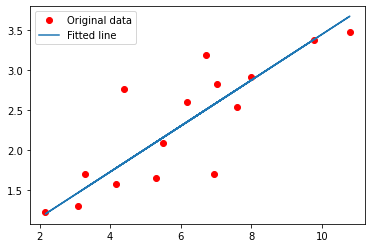

In [58]:
# ================================================================== #
#                      6. Linear regression                          #
# ================================================================== #

import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # log    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}]. Loss {loss.item()}')


# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [98]:
# ================================================================== #
#                      7. Logistic regression                        #
# ================================================================== #

import torch
import torchvision
import torchvision.transforms as transforms


# Hyper-parameters 
input_size = 28 * 28
num_classes = 10
batch_size = 100
learning_rate = 0.01
num_epochs = 5

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST('./data',
                                          train=True, 
                                          transform=transforms.ToTensor(), 
                                          download=True)

test_dataset = torchvision.datasets.MNIST('./data',
                                          train=False,
                                          transform=transforms.ToTensor())
# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
total_steps = len(train_loader)
for epoch in range(num_epochs):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        x_train = images.reshape(-1, input_size)
        y_train = labels

        outputs = model(x_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.size()[0]
        correct += (predicted == labels).sum()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{total_steps}].', end=' ')
            print(f'Loss {loss.item()}. Accuracy {round(float(correct / total * 100), 2)}%') 

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
total_test_size = len(test_loader)
with torch.no_grad():
    correct = 0
    total = 0
    mean_loss = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        loss = criterion(outputs, labels)
        mean_loss += loss

        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.size()[0]
        correct += (predicted == labels).sum()
        
    print(f'Accuracy on {batch_size * total_test_size} test images is {round(float(correct / total * 100), 2)}%.', end=' ')
    print(f'Mean loss {mean_loss / total_test_size}')

# Save the model checkpoint
torch.save(model, 'model.ckpt')

Epoch [1/5], Step [100/600]. Loss 1.552392601966858. Accuracy 57.56%
Epoch [1/5], Step [200/600]. Loss 1.1817829608917236. Accuracy 68.02%
Epoch [1/5], Step [300/600]. Loss 0.9999436736106873. Accuracy 72.52%
Epoch [1/5], Step [400/600]. Loss 0.8950966000556946. Accuracy 75.1%
Epoch [1/5], Step [500/600]. Loss 0.7883087992668152. Accuracy 76.72%
Epoch [1/5], Step [600/600]. Loss 0.7335963249206543. Accuracy 77.92%
Epoch [2/5], Step [100/600]. Loss 0.7730816602706909. Accuracy 85.13%
Epoch [2/5], Step [200/600]. Loss 0.6986449956893921. Accuracy 85.31%
Epoch [2/5], Step [300/600]. Loss 0.7427100539207458. Accuracy 85.37%
Epoch [2/5], Step [400/600]. Loss 0.50473552942276. Accuracy 85.53%
Epoch [2/5], Step [500/600]. Loss 0.5400153994560242. Accuracy 85.6%
Epoch [2/5], Step [600/600]. Loss 0.6707976460456848. Accuracy 85.74%
Epoch [3/5], Step [100/600]. Loss 0.6281471252441406. Accuracy 86.21%
Epoch [3/5], Step [200/600]. Loss 0.5729823112487793. Accuracy 86.38%
Epoch [3/5], Step [300/60

In [102]:
# model = nn.Linear(input_size, output_size)
# model.load_state_dict(torch.load('./model.ckpt'))
# model

model = torch.load('./model.ckpt')

tensor([8])

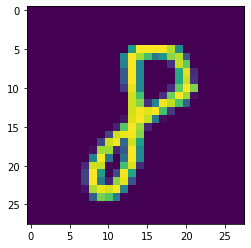

In [106]:
index = np.random.randint(0, len(test_dataset.data))
test_img = test_dataset.data[index]
plt.imshow(test_img)

pred = model(test_img.reshape(-1, input_size).type(torch.float32))
_, pred = torch.max(pred, dim=1)
pred

In [111]:
# ================================================================== #
#                      8. Neural Network                             #
# ================================================================== #

import torch
from torch import nn
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 28 * 28
hidden_size = 500
num_classes = 10
batch_size = 100
learning_rate = 0.001
num_epochs = 5

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST('./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST('./data',
                                          train=False,
                                          transform=transforms.ToTensor())
# Data loader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

model = NeuralNet(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_steps = len(train_loader)
for epoch in range(num_epochs):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, dim=1)
        total += labels.size()[0]
        correct += (labels == predicted).sum()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}]. Step [{i + 1}/{total_steps}].', end=' ')
            print(f'Loss {loss.item()}. Accuracy {round(float(correct / total * 100), 2)}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    total = 0
    correct = 0
    mean_loss = 0
    total_test_size = len(test_loader)
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)

        outputs = model(images)
        loss = criterion(outputs, labels)
        mean_loss += loss

        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.size()[0]
        correct += (labels == predicted).sum()
    
    print(f'Accuracy on {batch_size * total_test_size} test images is {round(float(correct / total * 100), 2)}', end=' ')
    print(f'Loss {mean_loss / total_test_size}')

# Save the model checkpoint
torch.save(model, 'model.pth')

Epoch [1/5]. Step [100/600]. Loss 0.4020805358886719. Accuracy 82.46
Epoch [1/5]. Step [200/600]. Loss 0.22645063698291779. Accuracy 87.1
Epoch [1/5]. Step [300/600]. Loss 0.14662274718284607. Accuracy 89.02
Epoch [1/5]. Step [400/600]. Loss 0.10996484011411667. Accuracy 90.22
Epoch [1/5]. Step [500/600]. Loss 0.13992802798748016. Accuracy 91.07
Epoch [1/5]. Step [600/600]. Loss 0.1276390254497528. Accuracy 91.77
Epoch [2/5]. Step [100/600]. Loss 0.19801005721092224. Accuracy 96.28
Epoch [2/5]. Step [200/600]. Loss 0.07692839205265045. Accuracy 96.29
Epoch [2/5]. Step [300/600]. Loss 0.12974116206169128. Accuracy 96.33
Epoch [2/5]. Step [400/600]. Loss 0.1906457096338272. Accuracy 96.42
Epoch [2/5]. Step [500/600]. Loss 0.12221135199069977. Accuracy 96.47
Epoch [2/5]. Step [600/600]. Loss 0.13145576417446136. Accuracy 96.51
Epoch [3/5]. Step [100/600]. Loss 0.2422337532043457. Accuracy 97.73
Epoch [3/5]. Step [200/600]. Loss 0.09259098023176193. Accuracy 97.76
Epoch [3/5]. Step [300/60

In [118]:
model = torch.load('model.pth')

tensor([3])

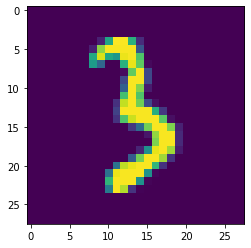

In [119]:
idx = np.random.randint(0, len(test_loader))
test_img  = test_dataset.data[idx]
plt.imshow(test_img)
output = model(test_img.reshape(-1, input_size).type(torch.float32))
_, pred = torch.max(output, dim=1)
pred